### Predictive Analytics on Student grades

Predictive Analytics to estimate grades of students by exploring and analysing academic and non-academic information of students

<b>Note:</b> Update variables under <b>Variables</b> section to configure inputs if required before running the notebook.

The cell <b>#1</b> has inputs and the cell <b>#53</b> reveals output

To run notebook cell by cell, click on a cell and click <b>Run</b> button below the <b>Menu</b> bar. Or to run all cells, select <b>Cell --> Run All</b> from Menu bar.

#### Variables

In [1]:
INPUT_FILE="student-mat.csv"
OUTPUT_VARIABLE = 'G3' #variable to be predicted

###### If there're more than one file, load and club all the files; ignore otherwise

In [2]:
INPUT_FILE2="student-por.csv"

#### Import libraries for data analysis

In [3]:
import numpy as np
import pandas as pd

#### Import libraries for data visualisation

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Import libraries for machine learning

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

####  Description of data to be loaded
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets.
These students can be identified by searching for identical attributes that characterize each student

#### Load input data and merge to unified dataset
##### If your dataset had only one file, you wouldn't have second file to load

Loading input file 1 into dataframe

In [8]:
df = pd.read_csv(INPUT_FILE)

Loading input file 2 into dataframe

In [9]:
df_por = pd.read_csv(INPUT_FILE2)

Merging input file 1 and input file 2 into a single dataframe; this step could be ignored if there's only one file

In [10]:
df = pd.merge(df, df_por, how='left', suffixes=(None, "_y"), left_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], \
                          right_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [11]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'guardian_y',
       'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y', 'famsup_y',
       'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
       'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y',
       'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

Selecting features from the dataframe

In [12]:
df_examples = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [13]:
df_examples.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

### Preprocessing and Visualisation

#### Convert non-numerical data to numerical data

In [14]:
df_examples['school'] = df_examples['school'].map({'GP': 0, 'MS': 1}).astype(int)
df_examples['sex'] = df_examples['sex'].map({'F': 0, 'M': 1}).astype(int)
df_examples['address'] = df_examples['address'].map({'R': 0, 'U': 1}).astype(int)
df_examples['famsize'] = df_examples['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
df_examples['Pstatus'] = df_examples['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
df_examples['Mjob'] = df_examples['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_examples['Fjob'] = df_examples['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_examples['reason'] = df_examples['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
df_examples['guardian'] = df_examples['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
df_examples['schoolsup'] = df_examples['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['famsup'] = df_examples['famsup'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['paid'] = df_examples['paid'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['activities'] = df_examples['activities'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['nursery'] = df_examples['nursery'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['higher'] = df_examples['higher'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['internet'] = df_examples['internet'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['romantic'] = df_examples['romantic'].map({'no': 0, 'yes': 1}).astype(int)

C:\Users\BALAJI~1\AppData\Local\Temp/ipykernel_32740/224265584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples['school'] = df_examples['school'].map({'GP': 0, 'MS': 1}).astype(int)
C:\Users\BALAJI~1\AppData\Local\Temp/ipykernel_32740/224265584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples['sex'] = df_examples['sex'].map({'F': 0, 'M': 1}).astype(int)
C:\Users\BALAJI~1\AppData\Local\Temp/ipykernel_32740/224265584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

#### Correlation of features

In [15]:
corr = df_examples.corr()
corr.head()

school       sex       age   address   famsize   Pstatus      Medu  \
school   1.000000 -0.025139  0.376704 -0.277095 -0.065662  0.044307 -0.144265   
sex     -0.025139  1.000000 -0.033941 -0.019370 -0.077758  0.028501  0.092762   
age      0.376704 -0.033941  1.000000 -0.142339 -0.034142  0.031052 -0.167380   
address -0.277095 -0.019370 -0.142339  1.000000 -0.061787 -0.036980  0.139377   
famsize -0.065662 -0.077758 -0.034142 -0.061787  1.000000  0.154814  0.046279   

             Fedu      Mjob      Fjob  ...    famrel  freetime     goout  \
school  -0.090747 -0.064173  0.011223  ... -0.072780  0.015606 -0.020438   
sex      0.049241  0.202360  0.095259  ...  0.065760  0.232397  0.071819   
age     -0.166154 -0.066866 -0.037473  ...  0.042374  0.012131  0.125013   
address  0.074585  0.118235  0.005054  ...  0.016206  0.033076  0.065796   
famsize  0.062380 -0.056174  0.091003  ...  0.024875 -0.018556 -0.024308   

             Dalc      Walc    health  absences        G1        G2        G3  
school   0.112023  0.059819 -0.037768 -0.089104 -0.033213 -0.056573 -0.054836  
sex      0.259949  0.263709  0.143266 -0.070324  0.092725  0.089692  0.095790  
age      0.128170  0.116355 -0.066089  0.176582 -0.075825 -0.151792 -0.171036  
address -0.098214 -0.105325 -0.033840 -0.031959  0.063657  0.117673  0.094048  
famsize -0.107035 -0.108456  0.035555 -0.040535 -0.075366 -0.084788 -0.088003  

[5 rows x 33 columns]

Check if there're any null values in the dataset

In [16]:
sns.heatmap(df_examples.isnull(),cmap='Reds')

<AxesSubplot:>

Draw heatmap with computed correlation scores

<AxesSubplot:>

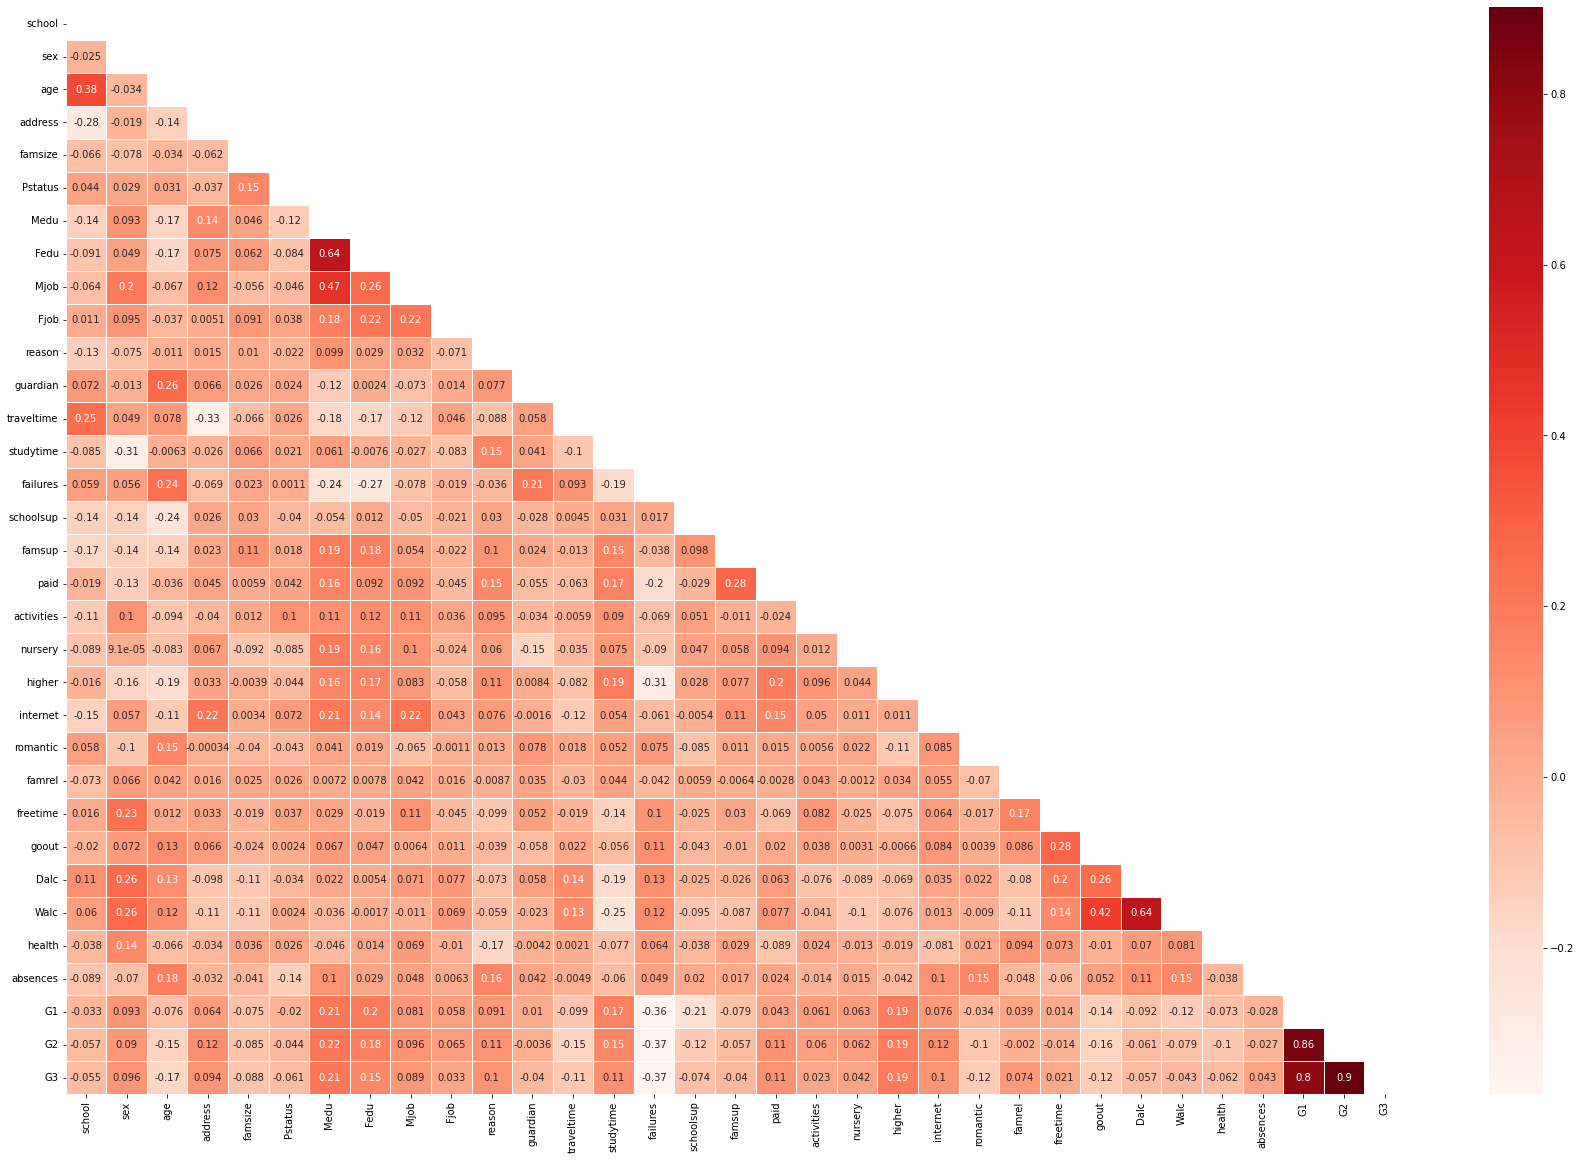

In [17]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30,20))
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Reds',annot=True)

#### Role of study time in grades

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

<AxesSubplot:xlabel='G3', ylabel='studytime'>

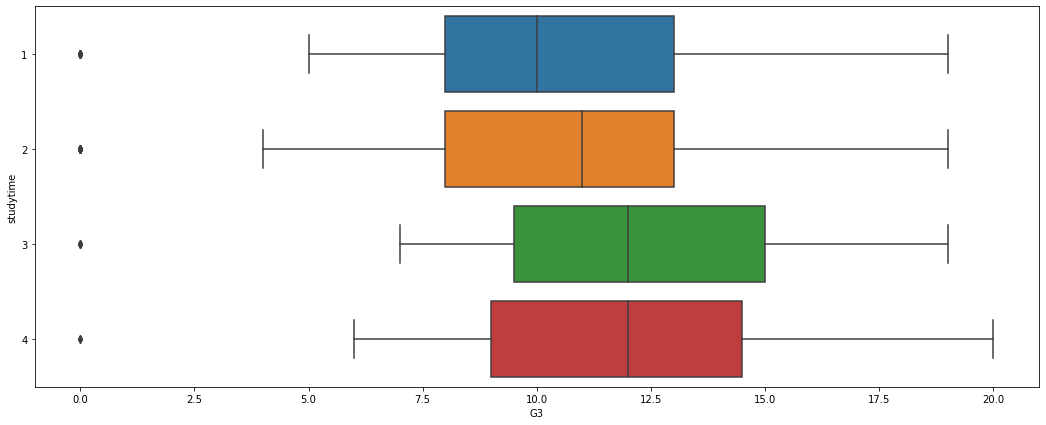

In [18]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="studytime", data=df_examples, orient='h')

#### Analysis of travel time and grades

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

<AxesSubplot:xlabel='G3', ylabel='traveltime'>

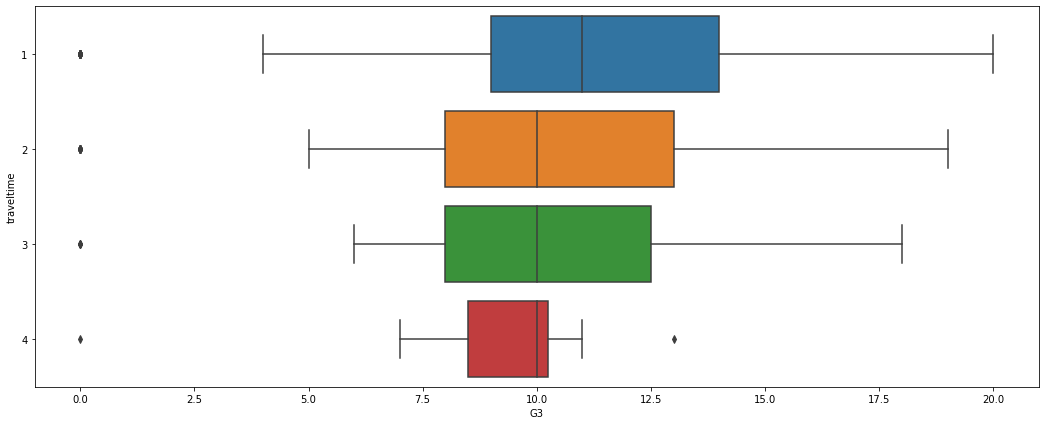

In [19]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="traveltime", data=df_examples, orient='h')

#### Internet connectivity influence with grades

internet - Internet access at home (binary: yes(1) or no(0))

In [20]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="internet", data=df_examples, orient='h')

<AxesSubplot:xlabel='G3', ylabel='internet'>

#### Students with interest to pursue higher education and their grades

higher - wants to take higher education (binary: yes(1) or no(0))

<AxesSubplot:xlabel='G3', ylabel='higher'>

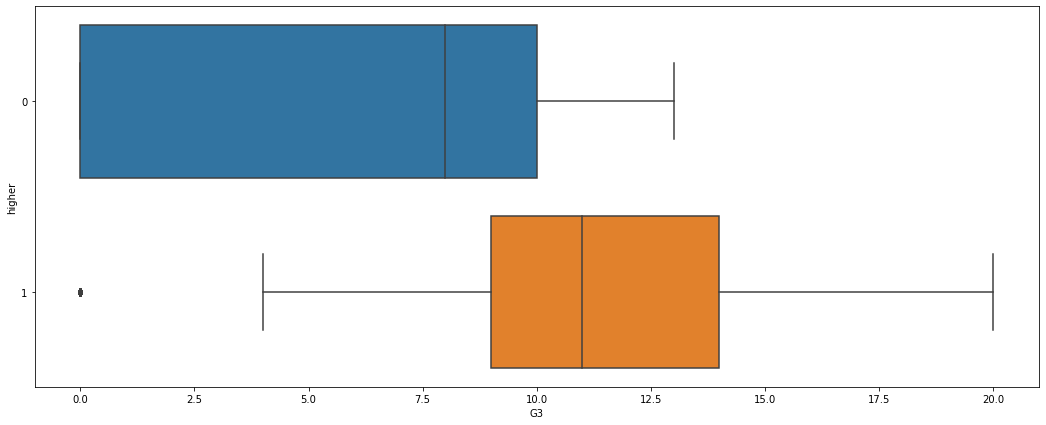

In [21]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="higher", data=df_examples, orient='h')

#### Past class failures effect on current grades

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

In [22]:
plt.figure(figsize=(18,7))
# sns.boxplot(x="G3", y="failures", data=df_examples, orient='h')
sns.barplot(x="failures", y="G3", data=df_examples)

<AxesSubplot:xlabel='failures', ylabel='G3'>

#### Periodical grades distribution

These grades are related with the course subject, Math:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

In [23]:
sns.kdeplot(df_examples['G1'],shade=True,color='red')
sns.kdeplot(df_examples['G2'],color='green',shade=True)
sns.kdeplot(df_examples['G3'],color='blue',shade=True)
plt.xlabel("G1, G2, G3")
plt.legend(labels=["G1", "G2", "G3"])
plt.show()

### Machine Learning - Train and Predict

#### Separation of input and target variables

Including all but target variable

In [24]:
df_X = df_examples.loc[:, df_examples.columns!=OUTPUT_VARIABLE]
df_X.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        1        0     4     4     0     4  ...   
1       0    0   17        1        1        1     1     1     0     2  ...   
2       0    0   15        1        0        1     1     1     0     2  ...   
3       0    0   15        1        1        1     4     2     1     3  ...   
4       0    0   16        1        1        1     3     3     2     2  ...   

   romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
0         0       4         3      4     1     1       3         6   5   6  
1         0       5         3      3     1     1       3         4   5   5  
2         0       4         3      2     2     3       3        10   7   8  
3         1       3         2      2     1     1       5         2  15  14  
4         0       4         3      2     1     2       5         4   6  10  

[5 rows x 32 columns]

Taking target variable as output

In [25]:
df_y = df_examples.loc[:, OUTPUT_VARIABLE]
df_y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

#### Split dataset into train and test sets

Update features/columns in stratify if required

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=21, shuffle=True, stratify=df_examples[["school", "famsize"]])

### Model building and evaluation

#### Linear Regression

In [27]:
lr = LinearRegression()

In [28]:
reg = lr.fit(X_train, y_train)

In [29]:
reg.score(X_train, y_train)

0.8425429152370716

In [30]:
y_pred = lr.predict(X_test)

In [31]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  3.585021393023437
mean_absolute_error:  1.227135659652104
r2_score:  0.8258259837666937
median_absolute_error:  0.7870937008809804


#### Random Forest

In [32]:
rfr  = RandomForestRegressor()

In [33]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
rfr.score(X_train, y_train)

0.9852855655884718

##### collect important featues

In [35]:
feats = {} 
for feature, importance in zip(df_examples.columns, rfr.feature_importances_):
    feats[feature] = importance

In [36]:
sorted(feats, key=feats.get, reverse=True)

['G2',
 'absences',
 'age',
 'famrel',
 'reason',
 'health',
 'guardian',
 'Mjob',
 'G1',
 'studytime',
 'goout',
 'freetime',
 'paid',
 'Fedu',
 'failures',
 'Medu',
 'activities',
 'Walc',
 'Fjob',
 'traveltime',
 'school',
 'schoolsup',
 'nursery',
 'romantic',
 'sex',
 'address',
 'famsize',
 'Dalc',
 'famsup',
 'internet',
 'Pstatus',
 'higher']

In [37]:
y_pred = rfr.predict(X_test)

In [38]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  1.7438512195121951
mean_absolute_error:  0.7451219512195123
r2_score:  0.9152770549132948
median_absolute_error:  0.46000000000000085


In [39]:
y_pred

array([10.6 , 15.1 , 14.19, 14.11, 11.03, 15.66, 10.03,  8.88,  7.53,
        7.33,  6.62,  1.36,  5.91, 14.02, 10.75,  8.7 ,  8.7 , 18.07,
        9.03, 13.34,  9.67, 10.02,  4.3 ,  9.43,  9.12,  7.63, 11.7 ,
       11.62,  8.52,  0.  , 12.67, 10.47, 12.52,  0.  ,  9.49, 12.46,
       11.61, 18.1 , 11.22, 14.17, 12.99])

#### Decision Tree

In [40]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train)

1.0

In [41]:
y_pred = dtr.predict(X_test)

In [42]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  4.585365853658536
mean_absolute_error:  1.1219512195121952
r2_score:  0.7772254335260116
median_absolute_error:  1.0


#### SVM

In [43]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_train, y_train)

0.8056210213313418

In [44]:
y_pred = svr.predict(X_test)

In [45]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  4.075189595161446
mean_absolute_error:  1.1432833062217818
r2_score:  0.8020117425009714
median_absolute_error:  0.6495097017558731


#### ANN

In [46]:
def build_and_compile_model():
    model = keras.Sequential([
#       norm,
      layers.Input(32,),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [47]:
model = build_and_compile_model()

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [49]:
%%time
history = model.fit(
    x=X_train,
    y=y_train,
#     validation_split=0.2,
#     verbose=1,
    epochs=200)

Epoch 1/200
12/12 [==============================] - 1s 5ms/step - loss: 7.4254
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 3.2277
Epoch 3/200
12/12 [==============================] - 0s 890us/step - loss: 2.5983
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 2.0391
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 1.6086
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 1.4102
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 1.3296
Epoch 8/200
12/12 [==============================] - 0s 1ms/step - loss: 1.2395
Epoch 9/200
12/12 [==============================] - 0s 1ms/step - loss: 1.1854
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1771
Epoch 11/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1696
Epoch 12/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1372
Epoch 13/200
12/12 [===============

12/12 [==============================] - 0s 1ms/step - loss: 0.5435
Epoch 103/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5426
Epoch 104/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5363
Epoch 105/200
12/12 [==============================] - 0s 3ms/step - loss: 0.5191
Epoch 106/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5376
Epoch 107/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5204
Epoch 108/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5385
Epoch 109/200
12/12 [==============================] - 0s 960us/step - loss: 0.5241
Epoch 110/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5783
Epoch 111/200
12/12 [==============================] - 0s 1ms/step - loss: 0.5316
Epoch 112/200
12/12 [==============================] - 0s 837us/step - loss: 0.5171
Epoch 113/200
12/12 [==============================] - 0s 727us/step - loss: 0.5183
Epoch 114/200
12/12 [===

In [50]:
# def plot_loss(history):
#   plt.plot(history.history['loss'], label='loss')
#   plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
#   plt.xlabel('Epoch')
#   plt.ylabel('Error [MPG]')
#   plt.legend()
#   plt.grid(True)

In [51]:
# plot_loss(history)

In [52]:
y_pred_train = model.predict(X_train)
print("r2_score: ", metrics.r2_score(y_train, y_pred_train))

r2_score:  0.9780346451434129


In [53]:
y_pred = model.predict(X_test)

In [54]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  2.162352639176306
mean_absolute_error:  0.9200179711347674
r2_score:  0.8949446593510009
median_absolute_error:  0.6112346649169922


#### Recommendation

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)
   
Criteria to recommend the subject, Math for higher education
    
 G1 + G2 + G3(predicted) >= Max obtainable grade in a test(20)

In [55]:
df_pred = pd.DataFrame(y_pred.tolist(), columns=["pred"])

In [56]:
# np.add(X_test.G1, X_test.G2)

In [57]:
lists = [X_test.G1.to_list(), X_test.G2.to_list(), df_pred.pred.to_list()]

In [58]:
tot_grad = list(map(sum, zip(*lists)))
np.where(np.array(tot_grad) >= 20)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37,
       38, 39, 40], dtype=int64)

In [59]:
np.where(np.array(tot_grad) < 20)

(array([11, 12, 29, 33], dtype=int64),)

In [60]:
X_test.reset_index().loc[np.where(np.array(tot_grad) < 20)[0]]

index  school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  ...  \
11    251       0    0   18        1        1        1     2     1     2  ...   
12    173       0    0   16        1        1        1     2     2     2  ...   
29    131       0    1   18        0        1        1     2     2     3  ...   
33    148       0    1   17        1        1        1     2     1     2  ...   

    romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
11         1       4         4      4     1     1       3         0   7   0  
12         0       5         1      5     1     1       4         0   6   7  
29         0       3         3      3     1     2       4         0   7   4  
33         0       5         4      5     1     2       5         0   5   0  

[4 rows x 33 columns]